# 1.A  

## DERIVATION FOR "ALPHA".
  
  
Consider a matrix  A  with  x1  and  x2∈Rm  as columns

x1  and  x2  span column space of  A 

Let  y∈Rm  be a vector which is not in column space of  Am×2 

That is  y  is not in the plane spanned by  x1  and  x2 

Let  y^  be the projected vector of  y  in the column space of  A 

Now  y^  is expressible as a linear combination of columns of  A

$$
\hat{y}=A\left[\begin{array}{l}
\alpha_{1} \\
\alpha_{2}
\end{array}\right]=A \alpha=\left[\begin{array}{cc}
| & | \\
x_{1} & x_{2} \\
| & |
\end{array}\right]\left[\begin{array}{l}
\alpha_{1} \\
\alpha_{2}
\end{array}\right]=\alpha_{1} x_{1}+\alpha_{2} x_{2}
$$
Now $A
\alpha+e=y$
or $\quad \hat{y}+e=y$

$$
\therefore A^{T} e=\left[\begin{array}{l}
x_{1}^{T} e \\
x_{2}^{T} e
\end{array}\right]=\left[\begin{array}{l}
0 \\
0
\end{array}\right]=0 \text { vector }
$$

$$
\text { Now } A \alpha+e=y
$$$A^{T} A \alpha+A^{T} e=A^{T} y$


$\alpha=\left(A^{T} A\right)^{-1} A^{T} y$

# 1.B

### PYTHON CODE TO COMPUTE THE PROJECTION MATRIX.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
m = 5
c = 10
x = np.arange(-5,6)
x.transpose
x = x.reshape(11,1)

In [37]:
print(x.shape)
print(x.ndim)
print(x)

(11, 1)
2
[[-5]
 [-4]
 [-3]
 [-2]
 [-1]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]]


In [15]:
# Line Equation
y = m*x + c
y = y.reshape(11,1)

In [38]:
print(y.shape)
print(y.ndim)
print(y)

(11, 1)
2
[[-15]
 [-10]
 [ -5]
 [  0]
 [  5]
 [ 10]
 [ 15]
 [ 20]
 [ 25]
 [ 30]
 [ 35]]


In [17]:
n = len(x)
print(n)

11


In [30]:
# Creting a Noise Vector.
np.random.seed(101)  # Seed functio is used to generate same random numbers whenever we excute the cell.
Noise = 5 * np.random.randn(n,1)
print(Noise.shape)
print(Noise)

(11, 1)
[[ 13.5342492 ]
 [  3.14066354]
 [  4.53984723]
 [  2.51912877]
 [  3.25558974]
 [ -1.59659022]
 [ -4.24038492]
 [  3.02982675]
 [-10.09084122]
 [  3.70061029]
 [  2.64406747]]


In [36]:
yd = y + Noise
print(yd.shape)
print(yd.ndim)
print(yd)

(11, 1)
2
[[-1.4657508 ]
 [-6.85933646]
 [-0.46015277]
 [ 2.51912877]
 [ 8.25558974]
 [ 8.40340978]
 [10.75961508]
 [23.02982675]
 [14.90915878]
 [33.70061029]
 [37.64406747]]


In [35]:
# Creating a matrix of ones using numpy ones function.
ones = np.ones((n,1))
print(ones.shape)
print(ones.ndim)
print(ones)

(11, 1)
2
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [40]:
A = np.concatenate((x,ones), axis = 1)
print(A.shape)
print(A.ndim)
print(A)

(11, 2)
2
[[-5.  1.]
 [-4.  1.]
 [-3.  1.]
 [-2.  1.]
 [-1.  1.]
 [ 0.  1.]
 [ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]]


In [42]:
A_Transpose = np.transpose(A)
print(A_Transpose.shape)
print(A_Transpose.ndim)
print(A_Transpose)

(2, 11)
2
[[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


In [43]:
A_transpose_A = np.matmul(A_Transpose,A)
print(A_transpose_A.shape)
print(A_transpose_A.ndim)
print(A_transpose_A)

(2, 2)
2
[[110.   0.]
 [  0.  11.]]


In [45]:
inverse = np.linalg.inv(A_transpose_A)
print(inverse)

[[0.00909091 0.        ]
 [0.         0.09090909]]


In [47]:
inverse_into_a_transpose = np.matmul(inverse,A_Transpose)
print(inverse_into_a_transpose)

[[-0.04545455 -0.03636364 -0.02727273 -0.01818182 -0.00909091  0.
   0.00909091  0.01818182  0.02727273  0.03636364  0.04545455]
 [ 0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.09090909
   0.09090909  0.09090909  0.09090909  0.09090909  0.09090909]]


In [48]:
Alpha = np.matmul(inverse_into_a_transpose, yd)
print(Alpha)

[[ 4.06747486]
 [11.85783333]]


In [49]:
y_cap = np.matmul(A,Alpha)
print(y_cap)

[[-8.47954096]
 [-4.4120661 ]
 [-0.34459124]
 [ 3.72288362]
 [ 7.79035847]
 [11.85783333]
 [15.92530819]
 [19.99278304]
 [24.0602579 ]
 [28.12773276]
 [32.19520761]]


Text(0, 0.5, 'Deependent Variable: Y ')

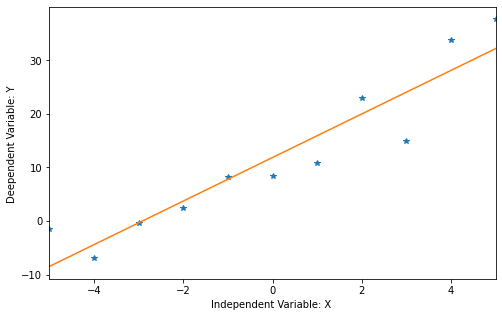

In [72]:
plt.figure(figsize=(8,5))
plt.plot(x,yd,'*')
plt.plot(x,y_cap)
plt.xlim(-5,5)
plt.xlabel("Independent Variable: X ")
plt.ylabel("Deependent Variable: Y ")

# 1.C    

## PYTHON CODE TO GENERATE DATA.


In [53]:
mu = np.array([160,7])
mu.reshape(2,1)
print(mu.shape)
print(mu)

(2,)
[160   7]


In [55]:
varX = 9
varY = 16
corC =0.8

covarXY = corC * np.sqrt(varX) * np.sqrt(varY)
print(covarXY)

9.600000000000001


In [56]:
sigma = np.array([[varX,covarXY],[covarXY,varY]])
print(sigma.shape)
print(sigma)

(2, 2)
[[ 9.   9.6]
 [ 9.6 16. ]]


In [57]:
n = 500

In [58]:
Data = np.random.multivariate_normal(mu,sigma,n)
print(Data.shape)
print(Data)

(500, 2)
[[ 1.61376091e+02  9.46354007e+00]
 [ 1.63228862e+02  9.15519719e+00]
 [ 1.57153877e+02  3.43564919e+00]
 [ 1.51367190e+02  1.52977662e+00]
 [ 1.57757510e+02  4.59296382e+00]
 [ 1.57482889e+02 -1.09181684e+00]
 [ 1.63334538e+02  1.14097000e+01]
 [ 1.58726194e+02  5.61950342e+00]
 [ 1.58496145e+02  6.97905714e+00]
 [ 1.59010029e+02  7.26834015e+00]
 [ 1.59714373e+02  5.28215232e+00]
 [ 1.63228324e+02  9.12763591e+00]
 [ 1.58819788e+02  5.00585492e+00]
 [ 1.54508149e+02 -2.20314499e-01]
 [ 1.55772826e+02 -1.65741072e+00]
 [ 1.60868937e+02  5.24702515e+00]
 [ 1.58729203e+02  7.88717710e+00]
 [ 1.60467036e+02  7.58418086e+00]
 [ 1.55557232e+02  6.32867980e+00]
 [ 1.62602540e+02  8.72893672e+00]
 [ 1.60764731e+02  8.48014189e+00]
 [ 1.60618688e+02  9.35624818e+00]
 [ 1.58345283e+02  2.19610289e+00]
 [ 1.56312398e+02 -1.25668761e+00]
 [ 1.57853914e+02  4.95036023e+00]
 [ 1.54770764e+02 -1.46442059e+00]
 [ 1.58527445e+02  6.69050941e+00]
 [ 1.57209764e+02  2.93073704e+00]
 [ 1.559425

In [59]:
# Retriving first column in data as X, and second column as Y.
X = Data[:,0]
X = X.reshape((500,1))

Y = Data[:,1]
Y = Y.reshape((500,1))

In [60]:
print(X.shape)
print(Y.shape)

(500, 1)
(500, 1)


Text(0, 0.5, 'Dependent Variable: WEIGHT')

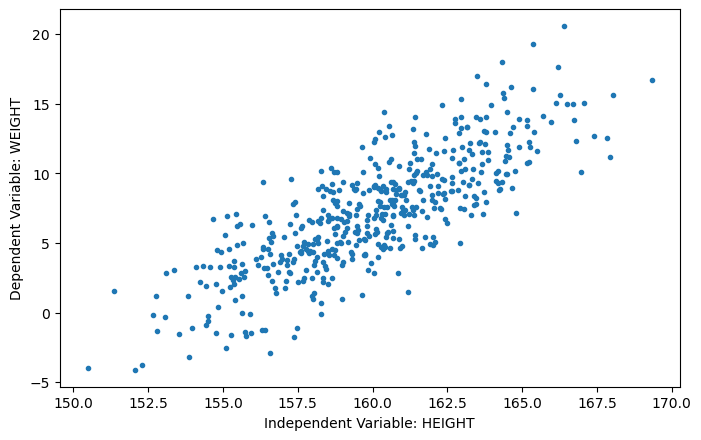

In [73]:
# PLOTTING THE DATA USING MATPLOTLIB LIBRARY FUNCTIONS.
plt.figure(figsize = (8,5),dpi=100)
plt.plot(X,Y,'.')
plt.xlabel("Independent Variable: HEIGHT")
plt.ylabel("Dependent Variable: WEIGHT")

# 1.D

In [74]:
Ones = np.ones((500,1))
print(Ones.shape)
print(Ones.ndim)

(500, 1)
2


In [75]:
a = np.concatenate((X,Ones), axis=1)
print(a.shape)

(500, 2)


In [76]:
a_transpose = np.transpose(a)
print(a_transpose.shape)

(2, 500)


In [77]:
a_transpose_a = np.matmul(a_transpose,a)
print(a_transpose_a.shape)
print(a_transpose_a)

(2, 2)
[[1.28032891e+07 7.99943244e+04]
 [7.99943244e+04 5.00000000e+02]]


In [78]:
Inverse = np.linalg.inv(a_transpose_a)
print(Inverse.shape)

(2, 2)


In [80]:
Inverse_into_atranspose = np.matmul(Inverse,a_transpose)
print(Inverse_into_atranspose.shape)
#print(Inverse_into_atranspose)

(2, 500)


In [81]:
alpha = np.matmul(Inverse_into_atranspose,Y)
print(alpha.shape)

(2, 1)


In [82]:
Ycap = np.matmul(a,alpha)
print(Ycap.shape)
print(Ycap)

(500, 1)
[[ 8.63656275]
 [10.57675928]
 [ 4.21511873]
 [-1.84461978]
 [ 4.84723439]
 [ 4.55965596]
 [10.68742151]
 [ 5.86162725]
 [ 5.62072319]
 [ 6.1588553 ]
 [ 6.8964347 ]
 [10.57619571]
 [ 5.95963793]
 [ 1.44454885]
 [ 2.7689009 ]
 [ 8.10547804]
 [ 5.8647784 ]
 [ 7.68461295]
 [ 2.54313447]
 [ 9.92088353]
 [ 7.99635465]
 [ 7.84342033]
 [ 5.46274246]
 [ 3.33393329]
 [ 4.94818782]
 [ 1.71955616]
 [ 5.65349995]
 [ 4.27364292]
 [ 2.94667313]
 [ 9.07584478]
 [11.08508156]
 [ 1.70690604]
 [12.03676841]
 [ 5.1402942 ]
 [ 5.39790556]
 [ 8.82017343]
 [ 5.29659086]
 [ 7.67005037]
 [ 1.91915625]
 [ 9.47274045]
 [ 2.33626945]
 [10.29267273]
 [ 6.80937589]
 [ 8.7421914 ]
 [ 8.61326476]
 [12.18393576]
 [10.94697626]
 [ 9.37155148]
 [ 7.92223642]
 [ 5.62862651]
 [ 7.56866666]
 [ 4.4034176 ]
 [ 3.54704015]
 [ 7.29138044]
 [ 8.46382105]
 [10.95734104]
 [ 9.2959473 ]
 [ 6.92988867]
 [ 0.87910963]
 [-0.33990272]
 [ 9.26939168]
 [ 5.37963431]
 [11.98902094]
 [ 8.54282705]
 [ 6.19605492]
 [ 5.49090682]
 

Text(0, 0.5, 'Dependent Variable')

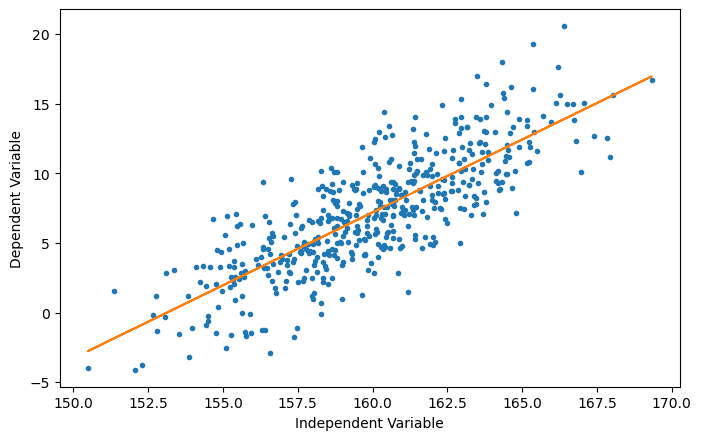

In [83]:
plt.figure(figsize=(8,5),dpi=100)
plt.plot(X,Y,'.')
plt.plot(X,Ycap)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")

### Check for Orthogonality.

In [84]:
Error_vector = Y - Ycap

In [85]:
Check = np.dot(a_transpose,Error_vector)
print(Check)

[[9.86674422e-08]
 [6.35470343e-10]]


## Since, we achieved zero matrix, it is obivious that Error vector is orthogonal to the column space of Data matrix.